In [1]:
import torch
import os
import random
from PIL import Image

In [2]:
torch.__version__

'2.1.0'

In [3]:
train_dir = 'C:\\Users\\mahima joshi\\Downloads\\Dogs_Vs_Cats\\Dogs_Vs_Cats\\train'
test_dir = 'C:\\Users\\mahima joshi\\Downloads\\Dogs_Vs_Cats\\Dogs_Vs_Cats\\test'
image_path = 'C:\\Users\\mahima joshi\\Downloads\\Dogs_Vs_Cats\\Dogs_Vs_Cats'

In [4]:
def walk_through_dir(dir_path):
    for dirpath,dirnames,filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

walk_through_dir(image_path)

There are 2 directories and 0 images in 'C:\Users\mahima joshi\Downloads\Dogs_Vs_Cats\Dogs_Vs_Cats'
There are 2 directories and 0 images in 'C:\Users\mahima joshi\Downloads\Dogs_Vs_Cats\Dogs_Vs_Cats\test'
There are 0 directories and 165 images in 'C:\Users\mahima joshi\Downloads\Dogs_Vs_Cats\Dogs_Vs_Cats\test\Cats'
There are 0 directories and 115 images in 'C:\Users\mahima joshi\Downloads\Dogs_Vs_Cats\Dogs_Vs_Cats\test\Dogs'
There are 2 directories and 0 images in 'C:\Users\mahima joshi\Downloads\Dogs_Vs_Cats\Dogs_Vs_Cats\train'
There are 0 directories and 12335 images in 'C:\Users\mahima joshi\Downloads\Dogs_Vs_Cats\Dogs_Vs_Cats\train\Cats'
There are 0 directories and 12385 images in 'C:\Users\mahima joshi\Downloads\Dogs_Vs_Cats\Dogs_Vs_Cats\train\Dogs'


In [5]:
from pathlib import Path
random.seed(42)
image_path_list=list(Path(image_path).glob("*/*/*.jpg"))
random_image_path=random.choice(image_path_list)
print(random_image_path)

C:\Users\mahima joshi\Downloads\Dogs_Vs_Cats\Dogs_Vs_Cats\train\Dogs\6253.jpg


In [6]:
image_class=random_image_path.parent.stem
print(image_class)

Dogs


Random Image Path:C:\Users\mahima joshi\Downloads\Dogs_Vs_Cats\Dogs_Vs_Cats\train\Dogs\6253.jpg
Image Class:Dogs
Image height:300
Image Width:341


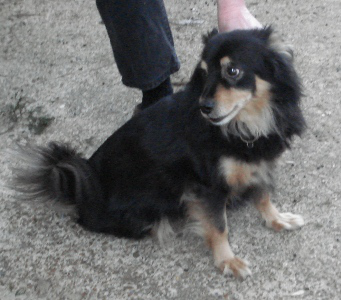

In [7]:
img=Image.open(random_image_path)
print(f"Random Image Path:{random_image_path}")
print(f"Image Class:{image_class}")
print(f"Image height:{img.height}")
print(f"Image Width:{img.width}")
img

(-0.5, 340.5, 299.5, -0.5)

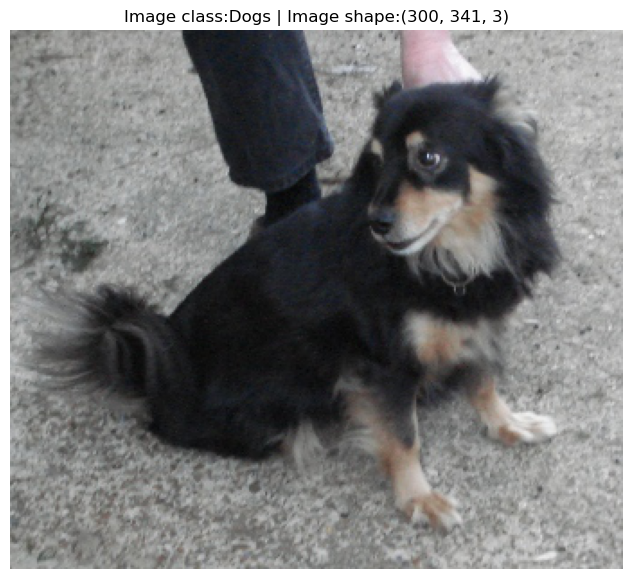

In [8]:
import numpy as np
import matplotlib.pyplot as plt
image_as_array = np.asarray(img)
plt.figure(figsize=(10,7))
plt.imshow(image_as_array)
plt.title(f"Image class:{image_class} | Image shape:{image_as_array.shape}")
plt.axis(False)

C:\Users\mahima joshi\anaconda3\Lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


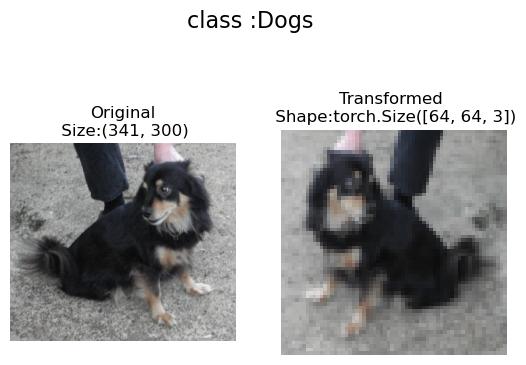

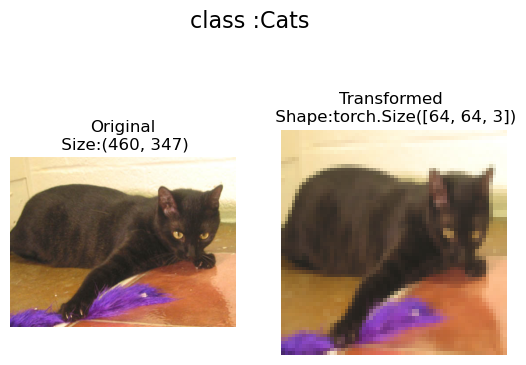

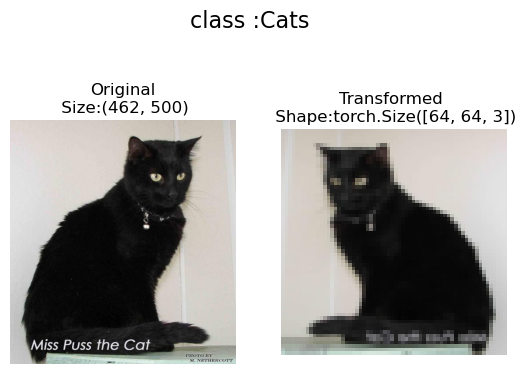

In [9]:
from torch.utils.data import DataLoader
from torchvision import datasets,transforms

data_transform =transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

def plot_transformed_images(image_paths: list,transform,n=3,seed=42):
    if seed:
        random.seed(42)
    random_image_paths = random.sample(image_paths,k=n)
    
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig,ax=plt.subplots(nrows=1,ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original\n Size:{f.size}")
            ax[0].axis(False)
            transformed_image=transform(f).permute(1,2,0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \n Shape:{transformed_image.shape}")
            ax[1].axis("off")
            fig.suptitle(f"class :{image_path.parent.stem}",fontsize=16)
            
plot_transformed_images(image_paths=image_path_list,transform=data_transform,n=3,seed=42)
            

In [10]:
train_data =datasets.ImageFolder( root=train_dir,
                                transform=data_transform,
                                target_transform=None)
test_data=datasets.ImageFolder(root=test_dir,
                              transform=data_transform)
train_data,test_data

(Dataset ImageFolder
     Number of datapoints: 24718
     Root location: C:\Users\mahima joshi\Downloads\Dogs_Vs_Cats\Dogs_Vs_Cats\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 280
     Root location: C:\Users\mahima joshi\Downloads\Dogs_Vs_Cats\Dogs_Vs_Cats\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [11]:
class_names=train_data.classes
class_names

['Cats', 'Dogs']

In [12]:
class_dict=train_data.class_to_idx
class_dict

{'Cats': 0, 'Dogs': 1}

In [13]:
from torch.utils.data import Dataset
from typing import Tuple,Dict,List

target_dir =train_dir
print(f"Target dir :{target_dir}")
class_names_found=sorted([entry.name for entry in list(os.scandir(target_dir))])
class_names_found

Target dir :C:\Users\mahima joshi\Downloads\Dogs_Vs_Cats\Dogs_Vs_Cats\train


['Cats', 'Dogs']

In [14]:
list(os.scandir(target_dir))

[<DirEntry 'Cats'>, <DirEntry 'Dogs'>]

In [15]:
def find_classes(directory:str) -> Tuple[List[str],Dict[str,int]]:
    classes=sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())
    
    if not classes:
        raise FileNotFoundError(f"Couldn't find the classes in {directory} please check file structure.")
    class_to_idx={class_name: i for i, class_name in enumerate(classes)}
    return classes,class_to_idx

find_classes(target_dir)

(['Cats', 'Dogs'], {'Cats': 0, 'Dogs': 1})

In [16]:
class ImageFolderCustom(Dataset):
    def __init__(self,target_dir:str,transform:None):
        self.paths=list(Path(target_dir).glob("*/*.jpg"))
        self.transform=transform
        self.classes,self.class_to_idx =find_classes(target_dir)
    def load_image(self,index:int)->Image.Image:
        image_path=self.paths[index]
        return Image.open(image_path)
    def __len__(self)->int:
        return len(self.paths)
    def __getitem__(self,index:int)->Tuple[torch.Tensor,int]:
        img=self.load_image(index)
        class_name=self.paths[index].parent.name
        class_idx=self.class_to_idx[class_name]
        if self.transform:
            return self.transform(img),class_idx
        else:
            return img,class_idx

In [17]:
train_transforms=transforms.Compose([
                    transforms.Resize(size=(64,64)),
                    transforms.RandomHorizontalFlip(p=0.5),
                    transforms.ToTensor()
    
])

test_transforms=transforms.Compose([
                    transforms.Resize(size=(64,64)),
                    transforms.ToTensor
])

In [18]:
train_data_custom=ImageFolderCustom(target_dir=train_dir,transform=train_transforms)
test_data_custom=ImageFolderCustom(target_dir=test_dir,transform=test_transforms)
train_data_custom,test_data_custom

(<__main__.ImageFolderCustom at 0x21235e53410>,
 <__main__.ImageFolderCustom at 0x21235e44850>)

In [19]:
len(train_data),len(train_data_custom),len(test_data),len(test_data_custom)
#len(train_data_custom),len(test_data_custom)

(24718, 24718, 280, 280)

In [20]:
train_data_custom.classes

['Cats', 'Dogs']

In [21]:
train_data_custom.class_to_idx

{'Cats': 0, 'Dogs': 1}

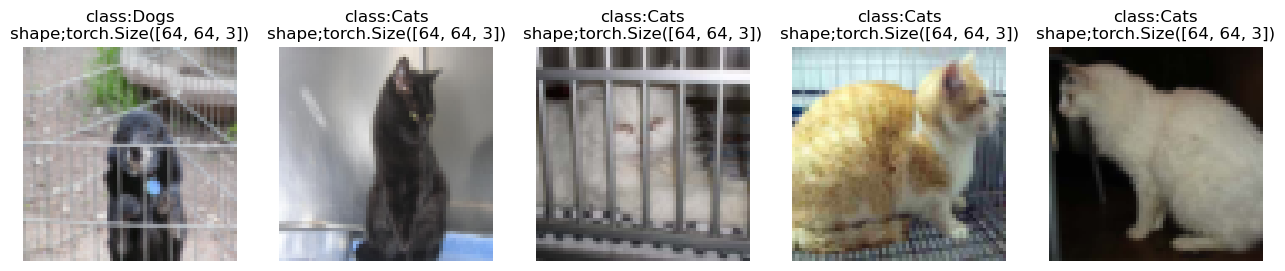

In [22]:
def display_random_images(dataset:torch.utils.data.Dataset,classes:List[str]=None,n:int=10,display_shape:bool=True,seed:int=None):
    if n>10:
        n=10
        display_shape=False
        print(f"for display purposes n shouldn't be greater than 10 setting n as 10")
    if seed:
        random.seed(seed)
    random_sample_idx=random.sample(range(len(dataset)),k=n)
    plt.figure(figsize=(16,8))
    for i,target_sample in enumerate(random_sample_idx):
        target_image,target_label =dataset[target_sample][0],dataset[target_sample][1]
        target_image_adjust=target_image.permute(1,2,0)
        plt.subplot(1,n,i+1)
        plt.imshow(target_image_adjust)
        plt.axis("off")
        if classes:
            title=f"class:{classes[target_label]}"
            if display_shape:
                title=title+ f"\nshape;{target_image_adjust.shape}"
        plt.title(title)

display_random_images(train_data,n=5,classes=class_names,seed=None)
            

for display purposes n shouldn't be greater than 10 setting n as 10


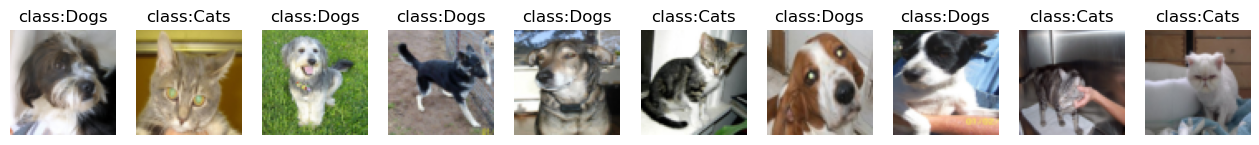

In [23]:
display_random_images(train_data_custom,n=20,classes=class_names,seed=None)

In [24]:
BATCH_SIZE=32
NUM_WORKERS=os.cpu_count()
train_dataloader_custom=DataLoader(dataset=train_data_custom,batch_size=BATCH_SIZE,num_workers=NUM_WORKERS,shuffle=True)
test_dataloader_custom=DataLoader(dataset=test_data_custom,batch_size=BATCH_SIZE,num_workers=NUM_WORKERS,shuffle=False)
train_dataloader_custom,test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x212378b40d0>,
 <torch.utils.data.dataloader.DataLoader at 0x21237377050>)

In [ ]:
# from tqdm import tqdm
# img_custom,label_custom=tqdm(next(iter(train_dataloader_custom)))
# img_custom.shape,label_custom.shape

In [25]:
train_transform=transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transform=transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.ToTensor()
])

In [26]:
image_path_list=list(Path(image_path).glob("*/*/*.jpg"))
image_path_list[:10]

[WindowsPath('C:/Users/mahima joshi/Downloads/Dogs_Vs_Cats/Dogs_Vs_Cats/test/Cats/9840.jpg'),
 WindowsPath('C:/Users/mahima joshi/Downloads/Dogs_Vs_Cats/Dogs_Vs_Cats/test/Cats/9841.jpg'),
 WindowsPath('C:/Users/mahima joshi/Downloads/Dogs_Vs_Cats/Dogs_Vs_Cats/test/Cats/9842.jpg'),
 WindowsPath('C:/Users/mahima joshi/Downloads/Dogs_Vs_Cats/Dogs_Vs_Cats/test/Cats/9843.jpg'),
 WindowsPath('C:/Users/mahima joshi/Downloads/Dogs_Vs_Cats/Dogs_Vs_Cats/test/Cats/9844.jpg'),
 WindowsPath('C:/Users/mahima joshi/Downloads/Dogs_Vs_Cats/Dogs_Vs_Cats/test/Cats/9845.jpg'),
 WindowsPath('C:/Users/mahima joshi/Downloads/Dogs_Vs_Cats/Dogs_Vs_Cats/test/Cats/9846.jpg'),
 WindowsPath('C:/Users/mahima joshi/Downloads/Dogs_Vs_Cats/Dogs_Vs_Cats/test/Cats/9847.jpg'),
 WindowsPath('C:/Users/mahima joshi/Downloads/Dogs_Vs_Cats/Dogs_Vs_Cats/test/Cats/9848.jpg'),
 WindowsPath('C:/Users/mahima joshi/Downloads/Dogs_Vs_Cats/Dogs_Vs_Cats/test/Cats/9849.jpg')]

In [27]:
simple_transform=transforms.Compose([transforms.Resize(size=(64,64)),
                                    transforms.ToTensor()
                                    ])

In [28]:
train_data_simple=datasets.ImageFolder(
                    root=train_dir,
                    transform=simple_transform)
test_data_simple=datasets.ImageFolder(
                    root=test_dir,
                    transform=simple_transform)


In [29]:
BATCH_size=32
NUM_WORKERS=os.cpu_count()

train_dataloader_simple=DataLoader(dataset=train_data_simple,
                                  batch_size=BATCH_SIZE,
                                  shuffle=True,
                                  num_workers=NUM_WORKERS)

test_dataloader_simple=DataLoader(dataset=test_data_simple,
                                  batch_size=BATCH_SIZE,
                                  shuffle=False,
                                  num_workers=NUM_WORKERS)


In [30]:
from torch import nn
class TinyVGG(nn.Module):
    """Model architecture copying Tiny VGG
    from CNN Explainer :poloclub.github.io"""
    
    def __init__(self,input_shape:int,hidden_units:int,output_shape:int)-> None:
        super().__init__()
        self.conv_block_1=nn.Sequential(
                nn.Conv2d(in_channels=input_shape,
                       out_channels=hidden_units,
                       kernel_size=3,
                       stride=1,
                       padding=0),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                       out_channels=hidden_units,
                       kernel_size=3,
                       stride=1,
                       padding=0),
            nn.ReLU(),
            
            nn.MaxPool2d(kernel_size=2,
                        stride=1)
            )
        self.conv_block_2=nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=0),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                     kernel_size=3,
                      stride=1,
                     padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                        stride=2)
            )
            
        self.classifier=nn.Sequential(
                            nn.Flatten(),
                            nn.Linear(in_features=hidden_units*27*27,
                                     out_features=output_shape)
                            )
    def forward(self,x):
        x=self.conv_block_1(x)
        #print(x.shape)
        x=self.conv_block_2(x)
        #print(x.shape)
        x=self.classifier(x)
        #print(x.shape)
        return x
        

In [31]:
torch.manual_seed(42)
model_0=TinyVGG(input_shape=3,
               hidden_units=10,
               output_shape=len(class_names))
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=7290, out_features=2, bias=True)
  )
)

In [32]:
image_batch,label_batch=next(iter(train_dataloader_simple))
image_batch.shape,label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [33]:
model_0(image_batch)
# train_dataloader_simple

tensor([[-0.0079, -0.0172],
        [-0.0075, -0.0158],
        [-0.0079, -0.0141],
        [-0.0069, -0.0174],
        [-0.0091, -0.0151],
        [-0.0054, -0.0157],
        [-0.0075, -0.0150],
        [-0.0028, -0.0137],
        [-0.0094, -0.0126],
        [-0.0060, -0.0145],
        [-0.0048, -0.0187],
        [-0.0079, -0.0158],
        [-0.0084, -0.0125],
        [-0.0075, -0.0172],
        [-0.0051, -0.0147],
        [-0.0094, -0.0163],
        [-0.0048, -0.0155],
        [-0.0053, -0.0169],
        [-0.0066, -0.0143],
        [-0.0065, -0.0141],
        [-0.0085, -0.0151],
        [-0.0052, -0.0153],
        [-0.0064, -0.0135],
        [-0.0051, -0.0178],
        [-0.0051, -0.0158],
        [-0.0086, -0.0190],
        [-0.0046, -0.0192],
        [-0.0091, -0.0187],
        [-0.0104, -0.0177],
        [-0.0063, -0.0181],
        [-0.0054, -0.0197],
        [-0.0040, -0.0147]], grad_fn=<AddmmBackward0>)

In [34]:
import torchinfo
from torchinfo import summary
summary(model_0,input_size=[1,3,64,64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 2]                    --
├─Sequential: 1-1                        [1, 10, 59, 59]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 59, 59]           --
├─Sequential: 1-2                        [1, 10, 27, 27]           --
│    └─Conv2d: 2-6                       [1, 10, 57, 57]           910
│    └─ReLU: 2-7                         [1, 10, 57, 57]           --
│    └─Conv2d: 2-8                       [1, 10, 55, 55]           910
│    └─ReLU: 2-9                         [1, 10, 55, 55]           --
│    └─MaxPool2d: 2-10                   [1, 10, 27, 27]           --
├─Sequentia

In [35]:
def train_step(model:torch.nn.Module,
              dataloader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              optimizer:torch.optim.Optimizer,
              device=None):
    model.train()
    train_loss,train_acc=0,0
    for batch,(X,y) in enumerate(dataloader):
        y_pred=model(X)
        
        loss=loss_fn(y_pred,y)
        train_loss+=loss.item()
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        y_pred_class =torch.argmax(
        torch.softmax(y_pred,dim=1),dim=1)
        train_acc+=(y_pred_class==y).sum().item()/len(y_pred)
        
    train_loss=train_loss/len(dataloader)
    train_acc=train_acc/len(dataloader)
        
    return train_loss,train_acc    

In [36]:
def test_step(model:torch.nn.Module,
             dataloader:torch.utils.data.DataLoader,
             loss_fn:torch.nn.Module,
             device=None):
    model.eval()
    test_loss,test_acc=0,0
    
    with torch.inference_mode():
        for batch,(X,y) in enumerate(dataloader):
            test_pred_logits=model(X)
            
            loss=loss_fn(test_pred_logits,y)
            test_loss+=loss.item()
            
            test_pred_labels=test_pred_logits.argmax(dim=1)
            
            test_acc+=((test_pred_labels==y).sum().item()/len(test_pred_labels))
    test_loss=test_loss/len(dataloader)
    test_acc=test_acc/len(dataloader)
    return test_loss,test_acc

In [37]:
from tqdm.auto import tqdm
def train(model:torch.nn.Module,
         train_dataloader:torch.utils.data.dataloader,
         test_dataloader:torch.utils.data.dataloader,
         optimizer:torch.optim.Optimizer,
         loss_fn:torch.nn.Module=nn.CrossEntropyLoss(),
         epochs:int=5,
         device=None):
    results={"train_loss":[],
            "train_acc":[],
            "test_loss":[],
            "test_acc":[]}
    
    for epoch in tqdm(range(epochs)):
        train_loss,train_acc=train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer,
                                       device=None)
        test_loss,test_acc=test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn,
                                    device=None)
        
        print(f"Epoch:{epoch} | Train Loss: {train_loss:.4f} | Train accuracy: {train_acc:.4f} | Test loss: {test_loss:.4f} | Test accuracy: {test_acc:.4f}")
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)
        
    return results
    
    

            

In [38]:
torch.manual_seed(42)
NUM_EPOCHS=5
model_0 = TinyVGG(input_shape=3,
                 hidden_units=10,
                 output_shape=len(train_data.classes))

In [39]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(params=model_0.parameters(),lr=0.001)

In [40]:
from timeit import default_timer as timer
start_timer=timer()

In [41]:
model_0_results= train(model=model_0,
                      train_dataloader=train_dataloader_simple,
                      test_dataloader=test_dataloader_simple,
                      optimizer=optimizer,
                      loss_fn=loss_fn,
                      epochs=NUM_EPOCHS)
end_timer=timer()
print(f"Total training time :{end_timer-start_timer:.3f} seconds")

model_0_results

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch:0 | Train Loss: 0.6865 | Train accuracy: 0.5455 | Test loss: 0.6732 | Test accuracy: 0.5613
Epoch:1 | Train Loss: 0.6207 | Train accuracy: 0.6557 | Test loss: 0.6041 | Test accuracy: 0.6759
Epoch:2 | Train Loss: 0.5595 | Train accuracy: 0.7180 | Test loss: 0.5580 | Test accuracy: 0.7488
Epoch:3 | Train Loss: 0.5266 | Train accuracy: 0.7412 | Test loss: 0.5596 | Test accuracy: 0.7488
Epoch:4 | Train Loss: 0.5021 | Train accuracy: 0.7574 | Test loss: 0.5417 | Test accuracy: 0.7465
Total training time :1154.747 seconds


{'train_loss': [0.6864920074233417,
  0.6207034876630346,
  0.5595348104545401,
  0.5265549820730943,
  0.5021469230639518],
 'train_acc': [0.5454860469414157,
  0.6556609221955276,
  0.718016540380706,
  0.7411984845684716,
  0.7573865736462762],
 'test_loss': [0.6732030179765489,
  0.6040556033452352,
  0.5579740438196394,
  0.5595882766776614,
  0.5417023996512095],
 'test_acc': [0.5613425925925926,
  0.6759259259259259,
  0.7488425925925926,
  0.7488425925925926,
  0.7465277777777778]}

In [42]:
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [43]:
def plot_loss_curves(results:Dict[str,list[float]]):
    loss=results["train_loss"]
    test_loss=results["test_loss"]
    
    accuracy=results["train_acc"]
    test_accuracy=results["test_acc"]
    
    epoches=range(len(results["train_loss"]))
    
    plt.figure(figsize=(15,7))
    
    plt.subplot(1,2,1)
    plt.plot(epoches,loss,label="train_loss")
    plt.plot(epoches,test_loss,label="test_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.plot(epoches,accuracy,label="train_accuracy")
    plt.plot(epoches,test_accuracy,label="test_accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend();
    

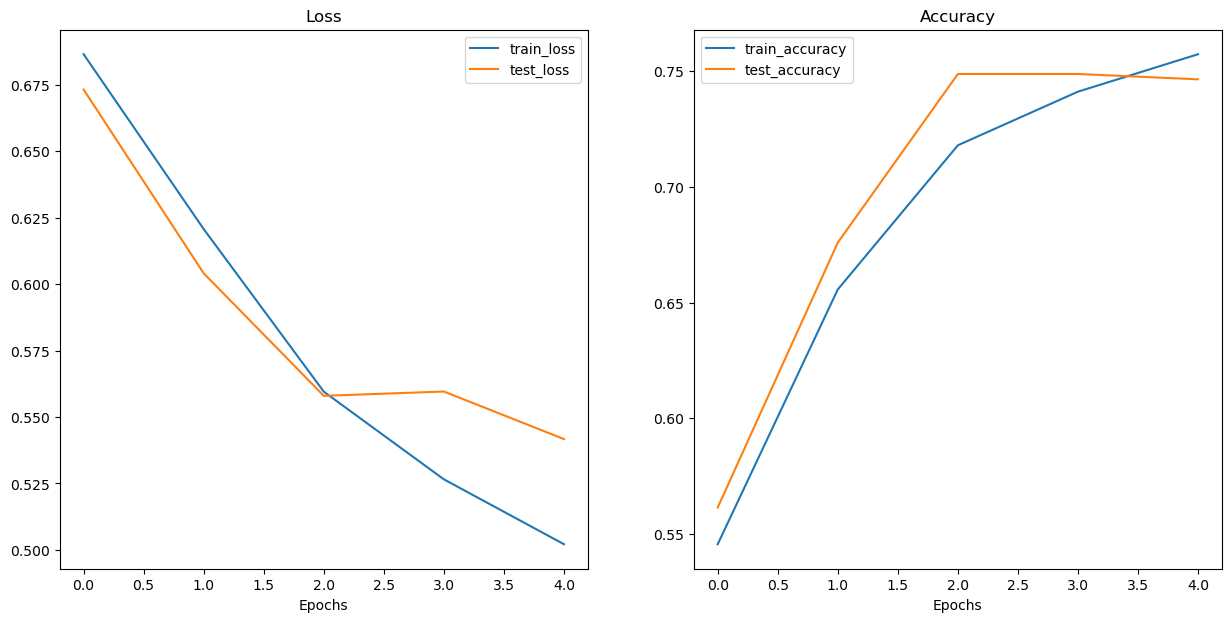

In [44]:
plot_loss_curves(model_0_results)

In [45]:
import PIL
import torchvision.transforms.functional as transform

# Reads a file using pillow
PIL_image = PIL.Image.open("C:\\Users\\mahima joshi\\Desktop\\check\\pic1.jpg")

# The image can be converted to tensor using
tensor_image = transform.to_tensor(PIL_image)

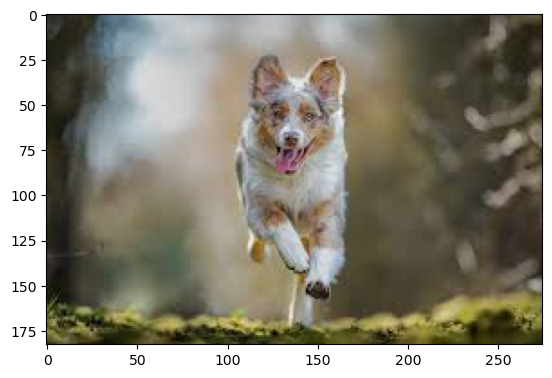

In [46]:
plt.imshow(tensor_image.permute(1,2,0))

In [47]:
print(f"custom image tensor: {tensor_image}")
print(f"custom image shape: {tensor_image.shape}")
print(f"custom image datatype: {tensor_image.dtype}")

custom image tensor: tensor([[[0.1608, 0.1569, 0.1490,  ..., 0.4314, 0.4118, 0.3804],
         [0.1804, 0.1765, 0.1686,  ..., 0.3765, 0.3569, 0.3294],
         [0.2000, 0.1961, 0.1882,  ..., 0.3529, 0.3373, 0.3137],
         ...,
         [0.4118, 0.3569, 0.3451,  ..., 0.1843, 0.1843, 0.1843],
         [0.2353, 0.2745, 0.3294,  ..., 0.1608, 0.1608, 0.1608],
         [0.1608, 0.2078, 0.2314,  ..., 0.1490, 0.1490, 0.1490]],

        [[0.1686, 0.1569, 0.1490,  ..., 0.4118, 0.3922, 0.3608],
         [0.1882, 0.1765, 0.1686,  ..., 0.3569, 0.3373, 0.3098],
         [0.2078, 0.1961, 0.1882,  ..., 0.3333, 0.3176, 0.2941],
         ...,
         [0.4039, 0.3490, 0.3373,  ..., 0.1725, 0.1725, 0.1725],
         [0.2196, 0.2588, 0.3176,  ..., 0.1608, 0.1608, 0.1608],
         [0.1412, 0.1882, 0.2157,  ..., 0.1451, 0.1451, 0.1451]],

        [[0.1647, 0.1569, 0.1490,  ..., 0.2941, 0.2745, 0.2431],
         [0.1843, 0.1765, 0.1608,  ..., 0.2392, 0.2196, 0.1922],
         [0.2039, 0.1961, 0.1804,  ..

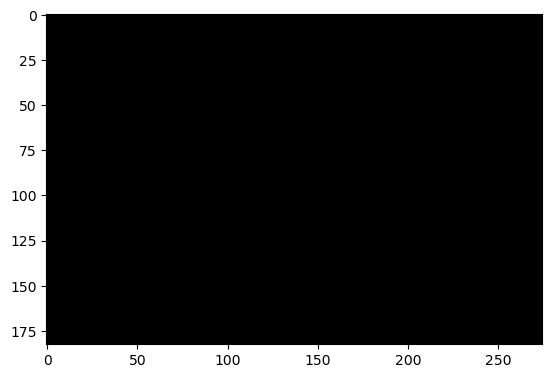

In [52]:
custom_image_transform=transforms.Compose([
    transforms.Resize(size=(64,64))
])

In [56]:
custom_image_transformed = custom_image_transform(tensor_image)
print(f"Original shape: {tensor_image.shape}")
print(f"Transformed shape: {custom_image_transformed.shape}")

Original shape: torch.Size([3, 183, 275])
Transformed shape: torch.Size([3, 64, 64])


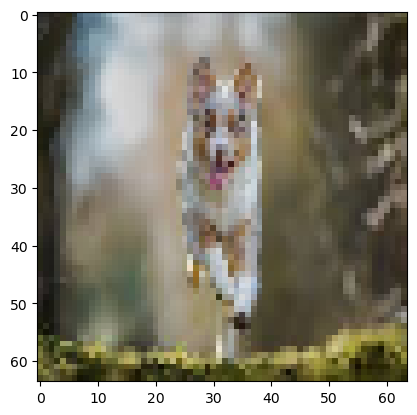

In [57]:
plt.imshow(custom_image_transformed.permute(1,2,0))

In [62]:
custom_image_transformed.shape,custom_image_transformed.unsqueeze(0).shap

(torch.Size([3, 64, 64]), torch.Size([1, 3, 64, 64]))

In [64]:
model_0.eval()
with torch.inference_mode():
    custom_image_pred =model_0(custom_image_transformed.unsqueeze(0))
custom_image_pred

tensor([[-0.0967,  0.1235]])

In [65]:
class_names

['Cats', 'Dogs']

In [66]:
custom_image_pred_probs=torch.softmax(custom_image_pred,dim=1)
custom_image_pred_probs

tensor([[0.4452, 0.5548]])

In [68]:
custom_image_pred_labels=torch.argmax(custom_image_pred_probs,dim=1)
custom_image_pred_labels

tensor([1])

In [81]:
import PIL
import torchvision.transforms.functional as transform

def pred_plot_img(model:torch.nn.Module,
                 image_path:str,
                 class_names:List[str]=None,
                 device=None):
    # Reads a file using pillow
    
    PIL_image = PIL.Image.open(image_path)

    # The image can be converted to tensor using
    tensor_image = transform.to_tensor(PIL_image)
    
    custom_image_transformed = custom_image_transform(tensor_image)
    
    model.eval()
    
    with torch.inference_mode():
        custom_image_pred =model_0(custom_image_transformed.unsqueeze(0))
        
    target_pred=torch.softmax(custom_image_pred,dim=1)
    
    target_image_pred_labels=torch.argmax(target_pred,dim=1)
    
    plt.imshow(tensor_image.permute(1,2,0))
    
    if class_names:
        title= f"Pred:{class_names[target_image_pred_labels]} | Prob: {target_pred.max():.3f}"
    else:
        title= f"Pred:{target_image_pred_labels} | Prob: {target_pred.max():.3f}"
    plt.title(title)
    plt.axis(False)

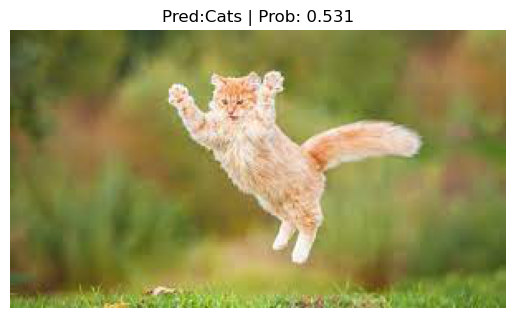

In [83]:
pred_plot_img(model=model_0,
             image_path="C:\\Users\\mahima joshi\\Desktop\\check\\pic2.jpg",
             class_names=class_names,
             device=None)